In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [542]:
#drop - A4 Purpose, A14 other installment plans
#numerical - A2 Duration in month, A5 Credit amount, A8 Installment rate, A11 Present residence since, A13 Age, A16 # of existing credits, A18 # of people being liable to provide maintenance for
#rest are categorical, we will apply ordinal encoding to these columns
dict1={'A11':0,'A14':1,'A12':2,'A13':3,'A30':0,'A31':1,'A32':2,'A33':3,'A34':4,'A65':0,'A61':1,'A62':2,'A63':3,'A64':4,'A71':1,'A72':2,'A73':3,'A74':4,'A75':5,'A91':0,'A93':0,'A94':0,'A92':1,'A95':1,'A101':1,'A102':2,'A103':3,'A124':0,'A123':1,'A122':2,'A121':3,'A153':0,'A151':1,'A152':3,'A171':1,'A172':2,'A173':3,'A174':4,'A191':0,'A192':1,'A201':0,'A202':1}
df=pd.read_csv('german.data')
cols=list(df.columns[1:])

In [543]:
for i,col in enumerate(cols):
    df[col]=df['del'].map(lambda x:x.split()[i])
del df['del']
del df['Other installment plans']
del df['Purpose']
df

,Checking account status,Duration in month,Credit history,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors/guarantors,Present residence since,Property,Age in years,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Customer class
0,A11,6,A34,1169,A65,A75,4,A93,A101,4,A121,67,A152,2,A173,1,A192,A201,1
1,A12,48,A32,5951,A61,A73,2,A92,A101,2,A121,22,A152,1,A173,1,A191,A201,2
2,A14,12,A34,2096,A61,A74,2,A93,A101,3,A121,49,A152,1,A172,2,A191,A201,1
3,A11,42,A32,7882,A61,A74,2,A93,A103,4,A122,45,A153,1,A173,2,A191,A201,1
4,A11,24,A33,4870,A61,A73,3,A93,A101,4,A124,53,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,A101,4,A121,31,A152,1,A172,1,A191,A201,1
996,A11,30,A32,3857,A61,A73,4,A91,A101,4,A122,40,A152,1,A174,1,A192,A201,1
997,A14,12,A32,804,A61,A75,4,A93,A101,4,A123,38,A152,1,A173,1,A191,A201,1
998,A11,45,A32,1845,A61,A73,4,A93,A101,4,A124,23,A153,1,A173,1,A192,A201,2


In [544]:
numeric=['Duration in month','Credit amount','Installment rate in percentage of disposable income','Present residence since','Age in years','Number of existing credits at this bank','Number of people being liable to provide maintenance for','Customer class']
categorical=list(set(df.columns)-set(numeric))
print(len(numeric),len(categorical))

8 11


In [545]:
for cat in categorical:
    df[cat]=df[cat].map(lambda x:dict1[x])
for num in numeric:
    df[num]=df[num].map(lambda x:int(x))
df['Age in years']=df['Age in years'].map(lambda x:(x>25)*1)
df['Customer class']=df['Customer class'].map(lambda x:x-1)
df

,Checking account status,Duration in month,Credit history,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors/guarantors,Present residence since,Property,Age in years,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Customer class
0,0,6,4,1169,0,5,4,0,1,4,3,1,3,2,3,1,1,0,0
1,2,48,2,5951,1,3,2,1,1,2,3,0,3,1,3,1,0,0,1
2,1,12,4,2096,1,4,2,0,1,3,3,1,3,1,2,2,0,0,0
3,0,42,2,7882,1,4,2,0,3,4,2,1,0,1,3,2,0,0,0
4,0,24,3,4870,1,3,3,0,1,4,0,1,0,2,3,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,12,2,1736,1,4,3,1,1,4,3,1,3,1,2,1,0,0,0
996,0,30,2,3857,1,3,4,0,1,4,2,1,3,1,4,1,1,0,0
997,1,12,2,804,1,5,4,0,1,4,1,1,3,1,3,1,0,0,0
998,0,45,2,1845,1,3,4,0,1,4,0,0,0,1,3,1,1,0,1


In [546]:
#compare the percentage of favorable results for the privileged and unprivileged groups, 
#subtracting the former percentage from the latter
#0=male and 1=female
#customer class 0=good and 1=bad

Fgood=len(df[(df['Personal status and sex']==1) & (df['Customer class']==0)])
Ftotal=len(df[(df['Personal status and sex']==1)])

Mgood=len(df[(df['Personal status and sex']==0) & (df['Customer class']==0)])
Mtotal=len(df[(df['Personal status and sex']==0)])

print(Mgood/Mtotal,Fgood/Ftotal)

0.7231884057971014 0.6483870967741936


In [547]:
######################################################################

In [548]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

In [554]:
dfS=df.drop(['Age in years','Foreign worker'],axis=1)
X=dfS[['Checking account status', 'Duration in month', 'Credit history',
       'Credit amount', 'Savings account/bonds', 'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors/guarantors',
       'Present residence since', 'Property', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone']].values
Y=dfS[['Customer class']].values
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_test1=X_test.transpose()
s_col=X_test1[7]

In [555]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 0s 506us/sample - loss: 0.6176 - val_loss: 0.5872
Epoch 2/150
800/800 [==============================] - 0s 61us/sample - loss: 0.5653 - val_loss: 0.6110
Epoch 3/150
800/800 [==============================] - 0s 75us/sample - loss: 0.5496 - val_loss: 0.5931
Epoch 4/150
800/800 [==============================] - 0s 69us/sample - loss: 0.5322 - val_loss: 0.6545
Epoch 5/150
800/800 [==============================] - 0s 101us/sample - loss: 0.5509 - val_loss: 0.5904
Epoch 6/150
800/800 [==============================] - 0s 77us/sample - loss: 0.5571 - val_loss: 0.5988
Epoch 7/150
800/800 [==============================] - 0s 60us/sample - loss: 0.5177 - val_loss: 0.6075
Epoch 8/150
800/800 [==============================] - 0s 72us/sample - loss: 0.5392 - val_loss: 0.6222
Epoch 9/150
800/800 [==============================] - 0s 71us/sample - loss: 0.5068 - val_loss: 0.6127
Epoch 10/150
800

800/800 [==============================] - 0s 59us/sample - loss: 0.4360 - val_loss: 0.6640
Epoch 79/150
800/800 [==============================] - 0s 75us/sample - loss: 0.4240 - val_loss: 0.6748
Epoch 80/150
800/800 [==============================] - 0s 62us/sample - loss: 0.4169 - val_loss: 0.6863
Epoch 81/150
800/800 [==============================] - 0s 66us/sample - loss: 0.4068 - val_loss: 0.7579
Epoch 82/150
800/800 [==============================] - 0s 65us/sample - loss: 0.4349 - val_loss: 0.6889
Epoch 83/150
800/800 [==============================] - 0s 72us/sample - loss: 0.4542 - val_loss: 0.6585
Epoch 84/150
800/800 [==============================] - 0s 66us/sample - loss: 0.4393 - val_loss: 0.7017
Epoch 85/150
800/800 [==============================] - 0s 62us/sample - loss: 0.4353 - val_loss: 0.6571
Epoch 86/150
800/800 [==============================] - 0s 61us/sample - loss: 0.4192 - val_loss: 0.6822
Epoch 87/150
800/800 [==============================] - 0s 56us/samp

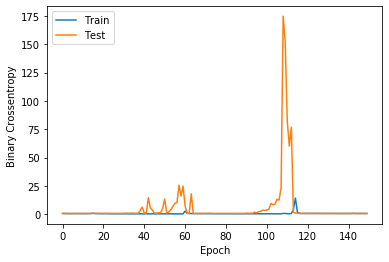

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 1s 971us/sample - loss: 0.6299 - val_loss: 0.6003
Epoch 2/150
800/800 [==============================] - 0s 84us/sample - loss: 0.5508 - val_loss: 0.5806
Epoch 3/150
800/800 [==============================] - 0s 80us/sample - loss: 0.5122 - val_loss: 0.5899
Epoch 4/150
800/800 [==============================] - 0s 92us/sample - loss: 0.4896 - val_loss: 0.5684
Epoch 5/150
800/800 [==============================] - 0s 90us/sample - loss: 0.4688 - val_loss: 0.5955
Epoch 6/150
800/800 [==============================] - 0s 74us/sample - loss: 0.4515 - val_loss: 0.5919
Epoch 7/150
800/800 [==============================] - 0s 65us/sample - loss: 0.4240 - val_loss: 0.5917
Epoch 8/150
800/800 [==============================] - 0s 66us/sample - loss: 0.4121 - val_loss: 0.5822
Epoch 9/150
800/800 [==============================] - 0s 64us/sample - loss: 0.3950 - val_loss: 0.6430
Epoch 10/150
800/

800/800 [==============================] - 0s 72us/sample - loss: 0.1164 - val_loss: 2.4972
Epoch 79/150
800/800 [==============================] - 0s 65us/sample - loss: 0.1133 - val_loss: 2.7719
Epoch 80/150
800/800 [==============================] - 0s 60us/sample - loss: 0.1119 - val_loss: 2.7427
Epoch 81/150
800/800 [==============================] - 0s 67us/sample - loss: 0.1287 - val_loss: 2.7616
Epoch 82/150
800/800 [==============================] - 0s 89us/sample - loss: 0.1464 - val_loss: 2.4028
Epoch 83/150
800/800 [==============================] - 0s 76us/sample - loss: 0.1229 - val_loss: 2.2768
Epoch 84/150
800/800 [==============================] - 0s 81us/sample - loss: 0.1218 - val_loss: 2.3561
Epoch 85/150
800/800 [==============================] - 0s 74us/sample - loss: 0.1411 - val_loss: 2.7464
Epoch 86/150
800/800 [==============================] - 0s 84us/sample - loss: 0.2240 - val_loss: 2.2699
Epoch 87/150
800/800 [==============================] - 0s 62us/samp

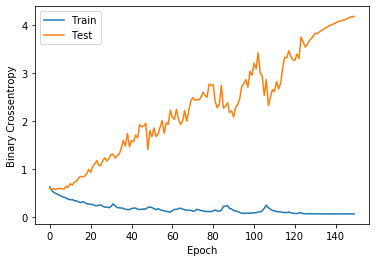

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 0s 566us/sample - loss: 0.7342 - val_loss: 0.7167
Epoch 2/150
800/800 [==============================] - 0s 54us/sample - loss: 0.6959 - val_loss: 0.6979
Epoch 3/150
800/800 [==============================] - 0s 64us/sample - loss: 0.6855 - val_loss: 0.6890
Epoch 4/150
800/800 [==============================] - 0s 87us/sample - loss: 0.6787 - val_loss: 0.6829
Epoch 5/150
800/800 [==============================] - 0s 96us/sample - loss: 0.6730 - val_loss: 0.6771
Epoch 6/150
800/800 [==============================] - 0s 62us/sample - loss: 0.6682 - val_loss: 0.6723
Epoch 7/150
800/800 [==============================] - 0s 56us/sample - loss: 0.6634 - val_loss: 0.6693
Epoch 8/150
800/800 [==============================] - 0s 74us/sample - loss: 0.6589 - val_loss: 0.6654
Epoch 9/150
800/800 [==============================] - 0s 72us/sample - loss: 0.6538 - val_loss: 0.6642
Epoch 10/150
800/

800/800 [==============================] - 0s 64us/sample - loss: 0.3487 - val_loss: 0.9822
Epoch 79/150
800/800 [==============================] - 0s 60us/sample - loss: 0.3486 - val_loss: 0.9939
Epoch 80/150
800/800 [==============================] - 0s 57us/sample - loss: 0.3478 - val_loss: 1.0282
Epoch 81/150
800/800 [==============================] - 0s 60us/sample - loss: 0.3459 - val_loss: 1.0062
Epoch 82/150
800/800 [==============================] - 0s 67us/sample - loss: 0.3440 - val_loss: 1.0044
Epoch 83/150
800/800 [==============================] - 0s 64us/sample - loss: 0.3435 - val_loss: 1.0008
Epoch 84/150
800/800 [==============================] - 0s 61us/sample - loss: 0.3439 - val_loss: 1.0365
Epoch 85/150
800/800 [==============================] - 0s 66us/sample - loss: 0.3416 - val_loss: 1.0388
Epoch 86/150
800/800 [==============================] - 0s 80us/sample - loss: 0.3399 - val_loss: 1.0775
Epoch 87/150
800/800 [==============================] - 0s 59us/samp

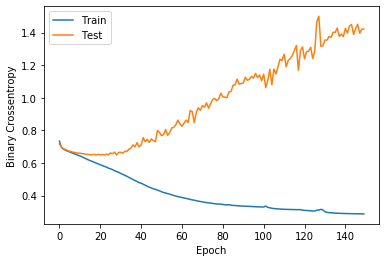

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 1s 754us/sample - loss: 0.6973 - val_loss: 0.7000
Epoch 2/150
800/800 [==============================] - 0s 76us/sample - loss: 0.6959 - val_loss: 0.6986
Epoch 3/150
800/800 [==============================] - 0s 75us/sample - loss: 0.6948 - val_loss: 0.6973
Epoch 4/150
800/800 [==============================] - 0s 95us/sample - loss: 0.6939 - val_loss: 0.6961
Epoch 5/150
800/800 [==============================] - 0s 80us/sample - loss: 0.6930 - val_loss: 0.6950
Epoch 6/150
800/800 [==============================] - 0s 57us/sample - loss: 0.6922 - val_loss: 0.6941
Epoch 7/150
800/800 [==============================] - 0s 56us/sample - loss: 0.6915 - val_loss: 0.6932
Epoch 8/150
800/800 [==============================] - 0s 75us/sample - loss: 0.6909 - val_loss: 0.6924
Epoch 9/150
800/800 [==============================] - 0s 47us/sample - loss: 0.6902 - val_loss: 0.6917
Epoch 10/150
800/

800/800 [==============================] - 0s 71us/sample - loss: 0.6541 - val_loss: 0.6651
Epoch 79/150
800/800 [==============================] - 0s 75us/sample - loss: 0.6535 - val_loss: 0.6649
Epoch 80/150
800/800 [==============================] - 0s 61us/sample - loss: 0.6529 - val_loss: 0.6648
Epoch 81/150
800/800 [==============================] - 0s 59us/sample - loss: 0.6522 - val_loss: 0.6645
Epoch 82/150
800/800 [==============================] - 0s 64us/sample - loss: 0.6516 - val_loss: 0.6641
Epoch 83/150
800/800 [==============================] - 0s 71us/sample - loss: 0.6510 - val_loss: 0.6639
Epoch 84/150
800/800 [==============================] - 0s 67us/sample - loss: 0.6503 - val_loss: 0.6639
Epoch 85/150
800/800 [==============================] - 0s 64us/sample - loss: 0.6497 - val_loss: 0.6635
Epoch 86/150
800/800 [==============================] - 0s 67us/sample - loss: 0.6491 - val_loss: 0.6633
Epoch 87/150
800/800 [==============================] - 0s 64us/samp

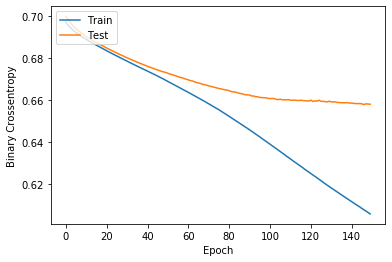

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 0s 533us/sample - loss: 0.6868 - val_loss: 0.6849
Epoch 2/150
800/800 [==============================] - 0s 53us/sample - loss: 0.6867 - val_loss: 0.6847
Epoch 3/150
800/800 [==============================] - 0s 51us/sample - loss: 0.6865 - val_loss: 0.6846
Epoch 4/150
800/800 [==============================] - 0s 57us/sample - loss: 0.6864 - val_loss: 0.6844
Epoch 5/150
800/800 [==============================] - 0s 65us/sample - loss: 0.6862 - val_loss: 0.6843
Epoch 6/150
800/800 [==============================] - 0s 73us/sample - loss: 0.6861 - val_loss: 0.6841
Epoch 7/150
800/800 [==============================] - 0s 52us/sample - loss: 0.6859 - val_loss: 0.6840
Epoch 8/150
800/800 [==============================] - 0s 58us/sample - loss: 0.6858 - val_loss: 0.6838
Epoch 9/150
800/800 [==============================] - 0s 58us/sample - loss: 0.6857 - val_loss: 0.6837
Epoch 10/150
800/

In [ ]:
for x in [0.1,0.01,0.001,0.0001,0.00001]:
    model=Sequential()

    model.add(Dense(20,input_dim=16,activation=LeakyReLU(alpha=0.01)))
    model.add(Dense(10,activation=LeakyReLU(alpha=0.01)))
    model.add(Dense(5,activation=LeakyReLU(alpha=0.01)))
    model.add(Dense(2,activation=LeakyReLU(alpha=0.01)))
    model.add(Dense(1,activation='sigmoid'))

    adamopt=Adam(lr=x)
    model.compile(loss='binary_crossentropy',optimizer=adamopt)
    model.count_params()
    
    model.fit(X_train,y_train,epochs=150,validation_data=(X_test,y_test))
    
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.ylabel('Binary Crossentropy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc='upper left')
    plt.show()

In [536]:
l1=[x for x in y_pred]
y_pred=model.predict(X_test)
df1=pd.DataFrame()
df1['y_pred']=l1
df1['y_pred']=df1['y_pred'].map(lambda x:int(x[0]))
df1['s_col']=s_col
df1

,y_pred,s_col
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
195,1,1
196,1,1
197,1,1
198,1,0


In [537]:
Fgood=len(df1[(df1['s_col']==1) & (df1['y_pred']==0)])
Ftotal=len(df1[(df1['s_col']==1)])

Mgood=len(df1[(df1['s_col']==0) & (df1['y_pred']==0)])
Mtotal=len(df1[(df1['s_col']==0)])

print(Mgood/Mtotal,Fgood/Ftotal)

0.0 0.0


In [538]:
# y_pred=model.predict(X_test)
# print('Accuracy - ',metrics.accuracy_score(y_test,y_pred))
# print('Precision - ',metrics.precision_score(y_test,y_pred))
# print('Recall - ',metrics.recall_score(y_test,y_pred))

In [539]:
import aif360
from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.preprocessing import DisparateImpactRemover

In [540]:
binaryLabelDataset=aif360.datasets.BinaryLabelDataset(
    favorable_label=0,
    unfavorable_label=1,
    df=dfS,
    label_names=['Customer class'],
    protected_attribute_names=['Personal status and sex'])

In [ ]:
DIR=DisparateImpactRemover(repair_level=1.0)
dataset_transf_train = di.fit_transform(binaryLabelDataset)
transformed = dataset_transf_train.convert_to_dataframe()[0]